In [21]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
import scipy.special as sps
import pandas as pd
import random
import seaborn as sns
import math
import json

In [22]:
#Model Variables and Parameters
average_age=20
# Average ages in base year for underground and overhead distribution lines (in years)
age_shape=10
# We selected age shape and scale in a way that age_shape*age_scale=average_age
age_scale=2
# We selected age shape and scale in a way that age_shape*age_scale=average_age
length_shape=2
# We selected length shape and scale in a way that length_shape*length_age=average_length
length_scale=0.25
# We selected age shape and scale in a way that length_shape*age scale=average_length
average_length=0.5
# Average length for underground and overhead distribution lines (in miles)
segment_number= 625
# Numbers of line segments in the network (Shrewsbury has 191.5 miles overhead, 121.7 miles underground line, eaach segment's length is considered about 0.5 miles. So by dividing (91.5+121.7)/.5 we calculated this parameter.
baseyear=2021
#the year in which we are going to start conducting cost analysis
underground_baseyear=121
#Length of undergeound lines in miles in base year
overhead_baseyear=191
#Length of overhead lines in miles in base year
r=0.1
# Discount rate=10%
easment_value=3000
# per-acre price of a conservation easement
nfir=2100
# Non-fatality incidence rates, number of accidents per 100000 workers
fir=15
# Fatality incidence rates, number of accidents per 100000 workers
employees=8514/255
#The number of IOU employees
injurycost=130658
#A randomly determined annual injury cost, per accident
vsl=6900000
#The value of a statistical life
# change underground replecost to 428400
overhead_line={'lifespan':60,'replcost':104000,'replcost_growth_rate':0,'om_growth_rate':0.05,'om_percentage_replcost':0.005,'corridor_length':60}
underground_line={'lifespan':40,'replcost':428400,'replcost_growth_rate':0,'om_growth_rate':0.05,'om_percentage_replcost':0.005,'corridor_length':120,'over_under_raplcost':357000}
# the above two dictionaries shows related parameters for overhead and underground lines and the parameters are as follows:
#lifespan=Useful lifespan of overhead line and underground lines
#replcost=Cost associated with replacing a line with the same line type after it reaches its life span. 
#replcost_growth_rate= replacement cost annual growth/decay rate 
# om_percentage_replcost= percentage of the overall replacement costs which equals to annual O&M expenses (OPEX) for each type of line
# corridor_length= length of the corridor in feet needed for calculating environmental cost.
# over_under_raplcost= replacement cost associated with replacing an overhead line with an underground line.
###

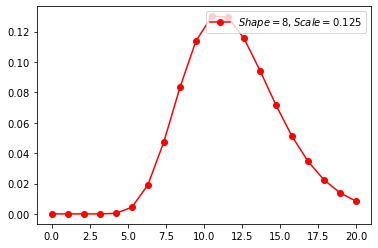

In [4]:
x = np.linspace(0, 20, 20)
y = stats.gamma.pdf(x, age_shape, age_scale)

plt.plot(x, y, "ro-", label=(r'$Shape=8, Scale=0.125$'))
plt.legend(loc='upper right')
#Plotting gamma distribution with shape and scale of line segment age

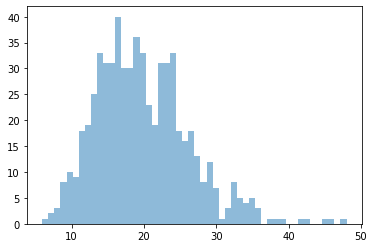

[19.38980749 22.52065719 15.67731186 26.10421415 34.53730532 17.10576209
 20.89446206 15.93436241 13.16421175 14.14131606 16.91024972 29.89566499
 21.95571095 17.87207961 22.0733952  20.14765608 17.05109096 26.73562172
 21.23019418  9.87350269 20.47639461 31.56133011 31.13805765 15.89264588
 20.99111625  9.30634802 18.45740622 24.52443997 24.16411386 21.94783691
 15.10125272  9.01060574 13.72532407 28.39087286 18.85556089 32.42142429
 20.64589666 10.80475075 12.51393463 15.51579894 18.5197327  25.55868195
 14.52448888 16.67462975 23.41032183 16.92615634 26.78578316 29.88359902
 23.61999106 14.13303174 21.75698878 16.14020264 24.41703657 20.61509103
 21.76562819 24.68735447 17.72020123 21.27577117 24.53153639 29.62421308
 10.44769276 18.34581832 38.10779944  9.02790924 19.86599737 14.19111365
 22.0953065  24.39555146 19.64809076 15.49586952 20.20336727 21.49414921
 29.98979376 20.01894472 24.48286869 23.4378889  15.04391314 15.24242557
 24.58806916 21.1042761  19.35559346  8.97203857 25

In [5]:
age=np.random.gamma(age_shape,age_scale,segment_number)
plt.hist(np.random.gamma(age_shape,age_scale,segment_number),alpha=0.5,bins=50)
plt.show()
print (age)
#Randomly determined segment's ages in the base year

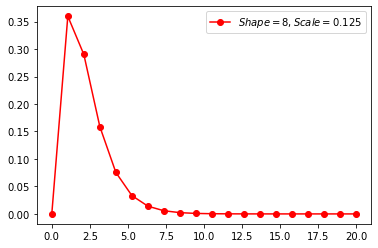

In [6]:
x = np.linspace(0, 20, 20)
y = stats.gamma.pdf(x, length_shape, length_scale)

plt.plot(x, y, "ro-", label=(r'$Shape=8, Scale=0.125$'))
plt.legend(loc='upper right')
#Plotting gamma distribution with shape and scale of line segments length
#length_shape*length_scale=average_length=0.5

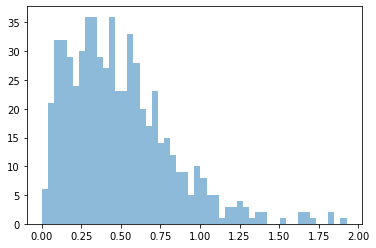

[0.80366105 0.32106771 0.43416307 0.1177677  0.20765835 0.85169699
 0.46102885 0.04421653 0.22448498 0.57724997 0.01878572 0.59547605
 0.85272805 1.16747659 0.20244114 1.62937676 0.63105747 0.24958123
 0.66645039 0.10085507 0.09552636 0.71817495 0.09629676 0.08873213
 0.24735643 0.83169169 0.93345017 0.47051488 0.3162684  0.06421021
 0.67243815 1.3469456  0.73273978 0.24908752 0.22325896 1.02391702
 0.98548925 0.66163452 0.34766202 0.76006371 0.09430472 1.12359749
 1.34389809 0.2823753  0.48036294 0.12959721 0.51132693 0.58023891
 0.04574726 0.40297313 0.05484955 0.35066022 0.98280069 0.40306397
 0.24876747 0.3622028  0.45669132 0.37054275 0.2774689  0.69028891
 0.4643011  0.68472111 0.10289687 0.18135358 1.40306032 0.6478643
 0.07405341 0.25004308 0.15476005 0.43630576 0.09759935 0.87710245
 0.39804615 0.50454433 0.20275902 0.99081023 0.24225704 0.52419578
 0.18847763 0.12586907 0.39186983 2.05035607 0.46280518 0.54312172
 0.45842489 0.6048455  0.03168675 0.15370001 0.3763359  0.03488

In [7]:
length=np.random.gamma(length_shape,length_scale,segment_number)
plt.hist(np.random.gamma(length_shape,length_scale,segment_number),alpha=0.5,bins=50)
plt.show()
print (length)
#Randomly determined circuit's ages in the base year

In [8]:
#Defining Line segment class with required attributes and methods and these methods are going to be modified based on requirements for each strategies in the simulations.
class Line_segment:
    ## The __init__ function as the constructor, which assigns random length, age and underground status for the base year to each line segment.
    def __init__(self, age_shape, age_scale, length_shape, length_scale, overhead_proportion):        
        self.age = [np.random.gamma(age_shape, age_scale)] # set the age as a list, which can be dynamically expanded
        self.length = np.random.gamma(length_shape,length_scale) # we can assume the length is fixed over time
        overhead_probability = random.uniform(0,1)
        if overhead_probability > overhead_proportion: # if underground = 0, then segment is overhead.
            self.underground = [1] # again, a dynamic list.
        else:
            self.underground = [0]
        if self.underground[0]==1:
            self.replcost_rate=[underground_line['replcost']]
        else:
            self.replcost_rate=[overhead_line['replcost']]       
        self.capex=[0]
        self.opex=[self.calculate_opex()]
        self.environmental_restoration=[]
    ###Lifecycle Infrastructure Costs:
    # Add one year to the age of line segment,compare it to the lifespan, starts from 1 when reaches to lifespan and append this age to age list. Also append underground status to its list.
    def update_age_and_underground_statusQuo(self):
        if self.underground[-1]==1:
            lifespan_current= int(underground_line['lifespan'])
        else:
            lifespan_current= int(overhead_line['lifespan'])
        age_current=self.age[-1]
        if age_current<(lifespan_current-1):
            age_current+=1
            self.age.append(age_current)
            self.underground.append(self.underground[0])
        else:
            self.age.append(1)
            self.underground.append(self.underground[0])
            
    def update_age_and_underground_under_after_lifespan(self):
        underground=self.underground[-1]
        if underground==1:
            lifespan_x= int(underground_line['lifespan'])
        else:
            lifespan_x= int(overhead_line['lifespan'])
        age=(self.age[-1])
        if age<(lifespan_x-1):
            age+=1
            self.age.append(age)
            self.underground.append(self.underground[-1])
        else:
            self.age.append(1)
            self.underground.append(1)
    
    #Add interest rate to the replacement cost and also cansider different replacementcost rate when underground=1        
    def add_replcost_intrest_rate(self):
        underground_current=self.underground[-1]
        underground_baseyear=self.underground[0]
        if underground_current==1:
            replcost_growth_rate_current=underground_line['replcost_growth_rate']
        else:
            replcost_growth_rate_current=overhead_line['replcost_growth_rate']
        if underground_current==underground_baseyear:        
            replcost_new=(self.replcost_rate[-1])+((replcost_growth_rate_current)*(self.replcost_rate[-1]))
            self.replcost_rate.append(replcost_new)
        else:
            replcost_new=underground_line['replcost']*((1+replcost_growth_rate_current)**(len(self.underground)-1))
            self.replcost_rate.append(replcost_new)
        return(self.replcost_rate)
    
    #Determine capital expenses which is replacement cost for each line segment based on the rate of replacement cost in that year and length of the circuit.
    def calculate_capex(self):
        if (self.age[-1])==1:
            length_current=self.length
            replcost_rate_current=self.replcost_rate[-1]
            replcost_new=(replcost_rate_current)*(length_current)
            self.capex.append(replcost_new)
        else:
            replcost_new=0
            self.capex.append(replcost_new)
        return(self.capex)
    
    #Determin operation and maintanace expenses which is a fraction of replacement rate for each circuit.
    def calculate_opex(self):
        underground_current=self.underground[-1]
        if underground_current==1:
            om_percentage_replcost_current=underground_line['om_percentage_replcost']
        else:
            om_percentage_replcost_current=overhead_line['om_percentage_replcost']
        length_current=self.length
        replcost_rate_current=self.replcost_rate[-1]
        opex=(om_percentage_replcost_current)*(length_current)*(replcost_rate_current)
        #opex_new=opex[-1]+om_growth_rate*opex[-1]
        #self.opex.append(opex)
        return(opex)
    
    #Add interest rate to opex.
    def add_opex_interest_rate(self):
        underground_current=self.underground[-1]
        if underground_current==1:
            om_growth_rate=underground_line['om_growth_rate']
        else:
            om_growth_rate=overhead_line['om_growth_rate']
        opex_new=self.opex[-1]+(self.opex[-1]*om_growth_rate)
        self.opex.append(opex_new)
        return(self.opex)

    #Determin the first retirement year
    def determine_first_retire(self):
        age_baseyear=self.age[0]
        underground=self.underground[0]
        if underground==0:
            lifespan_x=overhead_line['lifespan']
        elif underground==1:
            lifespan_x=underground_line['lifespan']
        first_retire=(lifespan_x)-(age_baseyear)
        return (np.ceil (first_retire))
 
    ###Environmental Costs:
    #Determin environmental restoration cost based on the length of overhead and underground lines. (1mile= 5280 foot, 1sqmile=640 Acre) 
    def calculate_environmental_restoration(self):
        environmental_restoration_current=0
        if self.underground[-1]==1:
            if self.underground[0]==1:
                corridor_length=overhead_line['corridor_length']
                self.environmental_restoration.append(environmental_restoration_current)
            else:
                corridor_length=underground_line['corridor_length']-overhead_line['corridor_length']
                environmental_restoration_current=((self.length)*(corridor_length)*640/5280*easment_value)
                self.environmental_restoration.append(environmental_restoration_current)
        else:
            corridor_length=underground_line['corridor_length']
            self.environmental_restoration.append(environmental_restoration_current)
        return(self.environmental_restoration)

    
    ###Safety and health Costs:
    #Return fatal cost which is one element of safety cost
    def calculate_non_fatal_cost(self):
        return(nfir*employees/100000*injurycost)
    
    #Return non-fatal cost which is one element of safety cost
    def calculate_fatal_cost(self):
        return(fir*employees/100000*vsl)

In [9]:
#run simulation for calculating cost elemnts of statusQuo strategy and assign a data frame to them.
def run_cost_simulation_statusQuo_strategy(years_of_analysis):
    global df_line_segment_array
    global df_cost_line_segment_statusQuo
    global net_present_value_statusQuo
    line_segment_array=[]
    line_segment_length_array=[]
    line_segment_age_array=[]
    line_segment_underground_array=[]
    line_segment_capex_array=[0 for t in range (years_of_analysis)]
    line_segment_opex_array=[0 for t in range (years_of_analysis)]
    underground_length_new_array=[0 for t in range (years_of_analysis)]
    line_segment_underground_length_total_array=[0 for t in range (years_of_analysis)]
    line_segment_environmental_restoration_cost_array=[0 for t in range (years_of_analysis)]
    line_segment_underground_rate_array=[]
    for i in range (segment_number):
        segment=Line_segment(age_shape, age_scale, length_shape, length_scale, 0.66)
        line_segment_array.append(segment)
        line_segment_length_array.append(segment.length)
        line_segment_age_array.append(segment.age[0])
        line_segment_underground_array.append(segment.underground[0])
        line_segment_underground_length_total_array[0]+=line_segment_array[i].underground[0]
    np.random.seed(10101)
    random.seed(10102)
    df_line_segment_array=pd.DataFrame([line_segment_length_array, line_segment_age_array,line_segment_underground_array]).transpose()
    df_line_segment_array.columns=['length','base year age','base year underground']
    for t in range (years_of_analysis):
        for i in range (len(line_segment_array)):
            line_segment_array[i].update_age_and_underground_statusQuo()
            line_segment_array[i].add_replcost_intrest_rate()
            line_segment_array[i].calculate_capex()
            line_segment_array[i].calculate_opex()
            line_segment_array[i].add_opex_interest_rate()
            line_segment_array[i].calculate_environmental_restoration()
            line_segment_capex_array[t]+=line_segment_array[i].capex[t]
            line_segment_opex_array[t]+=line_segment_array[i].opex[t]
    line_segment_Lifecycle_infrastructure_cost_array=[0 for t in range (years_of_analysis)]
    for t in range (years_of_analysis):
        line_segment_Lifecycle_infrastructure_cost_array[t]=line_segment_Lifecycle_infrastructure_cost_array[t]+line_segment_capex_array[t]+line_segment_opex_array[t]
    line_segment_environmental_restoration_cost_array=[0 for t in range (years_of_analysis)]
    line_segment_non_fatal_cost_array=[line_segment_array[0].calculate_non_fatal_cost() for t in range (years_of_analysis)]
    line_segment_fatal_cost_array=[line_segment_array[0].calculate_fatal_cost() for t in range (years_of_analysis)]
    line_segment_total_safety_cost_array=[0 for t in range (years_of_analysis)]
    for t in range (years_of_analysis):
        line_segment_total_safety_cost_array[t]=line_segment_non_fatal_cost_array[t]+line_segment_fatal_cost_array[t]

    line_segment_total_undergrounding_cost_array=[0 for t in range (years_of_analysis)]
    for t in range (years_of_analysis):
        line_segment_total_undergrounding_cost_array[t]+=line_segment_Lifecycle_infrastructure_cost_array[t]+line_segment_environmental_restoration_cost_array[t]+line_segment_total_safety_cost_array[t]
    df_cost_line_segment_statusQuo=pd.DataFrame([range(years_of_analysis), line_segment_underground_length_total_array,line_segment_capex_array,line_segment_opex_array,line_segment_Lifecycle_infrastructure_cost_array,line_segment_environmental_restoration_cost_array,line_segment_non_fatal_cost_array,line_segment_fatal_cost_array,line_segment_total_safety_cost_array,line_segment_total_undergrounding_cost_array]).transpose()
    df_cost_line_segment_statusQuo.columns=['year','total underground length','capex','opex','Lifecycle infrastructure cost','environmental restoration cost','non fatal cost','fatal cost','total safety cost','total undergrounding cost']
    df_cost_line_segment_statusQuo['year'] = df_cost_line_segment_statusQuo['year'].astype(int)
    net_present_value_lifecycle_infrastructure_cost=[]
    net_present_value_environmental_cost=[]
    net_present_value_safety_cost=[]
    net_present_value_total_statusQuo_strategy_cost=[]
    for index, row in df_cost_line_segment_statusQuo.iterrows():
        net_present_value_lifecycle_infrastructure_cost.append(row['Lifecycle infrastructure cost']/(1+r)**index)
        net_present_value_environmental_cost.append(row['environmental restoration cost']/(1+r)**index)
        net_present_value_safety_cost.append(row['total safety cost']/(1+r)**index)
        net_present_value_total_statusQuo_strategy_cost.append(row['total undergrounding cost']/(1+r)**index)
    total_infrastructre=sum(net_present_value_lifecycle_infrastructure_cost)
    total_environmental=sum(net_present_value_environmental_cost)
    total_safety=sum(net_present_value_safety_cost)
    total_total=sum(net_present_value_total_statusQuo_strategy_cost)
    net_present_value_statusQuo=pd.DataFrame([total_infrastructre,total_environmental,total_safety,total_total]).transpose()
    net_present_value_statusQuo.columns=['Net present value of lifecycle infrastructure cost','Net present value of environmental cost','Net present value of safety cost','Net present value of total statusQuo strategy cost']
    #print(df_line_segment_array)
    #print(net_present_value_statusQuo)
    #print(df_cost_line_segment_statusQuo)

In [10]:
run_cost_simulation_statusQuo_strategy(40)

In [11]:
df_line_segment_array

,length,base year age,base year underground
0,0.097069,13.010782,0.0
1,0.504770,9.843699,1.0
2,0.800408,13.018404,0.0
3,0.166398,19.625679,0.0
4,0.533270,19.867692,1.0
...,...,...,...
620,1.040030,10.358925,0.0
621,0.621206,19.576593,1.0
622,0.339110,18.350076,1.0
623,0.238019,21.045708,0.0


In [12]:
df_cost_line_segment_statusQuo

,year,total underground length,capex,opex,Lifecycle infrastructure cost,environmental restoration cost,non fatal cost,fatal cost,total safety cost,total undergrounding cost
0,0,220.0,0.000000e+00,3.476541e+05,3.476541e+05,0.0,91611.240988,34556.823529,126168.064518,4.738222e+05
1,1,0.0,0.000000e+00,3.650368e+05,3.650368e+05,0.0,91611.240988,34556.823529,126168.064518,4.912049e+05
2,2,0.0,0.000000e+00,3.832887e+05,3.832887e+05,0.0,91611.240988,34556.823529,126168.064518,5.094567e+05
3,3,0.0,0.000000e+00,4.024531e+05,4.024531e+05,0.0,91611.240988,34556.823529,126168.064518,5.286212e+05
4,4,0.0,8.740373e+04,4.225758e+05,5.099795e+05,0.0,91611.240988,34556.823529,126168.064518,6.361476e+05
5,5,0.0,2.731800e+05,4.437046e+05,7.168845e+05,0.0,91611.240988,34556.823529,126168.064518,8.430526e+05
6,6,0.0,9.687424e+05,4.658898e+05,1.434632e+06,0.0,91611.240988,34556.823529,126168.064518,1.560800e+06
7,7,0.0,6.479663e+05,4.891843e+05,1.137151e+06,0.0,91611.240988,34556.823529,126168.064518,1.263319e+06
8,8,0.0,1.445647e+05,5.136435e+05,6.582082e+05,0.0,91611.240988,34556.823529,126168.064518,7.843762e+05
9,9,0.0,2.659443e+05,5.393257e+05,8.052699e+05,0.0,91611.240988,34556.823529,126168.064518,9.314380e+05


In [13]:
net_present_value_statusQuo

,Net present value of lifecycle infrastructure cost,Net present value of environmental cost,Net present value of safety cost,Net present value of total statusQuo strategy cost
0,1.515263e+07,0.0,1.357184e+06,1.650981e+07


In [19]:
#run simulation for calculating cost elemnts of undergrounding after lifespan strategy and assign a data frame to them.
def run_cost_simulation_under_after_lifespan_strategy(years_of_analysis):
    global df_line_segment_array
    global df_cost_line_segment_under_after_lifespan
    global df_net_present_value_under_after_lifespan
    line_segment_array=[]
    line_segment_length_array=[]
    line_segment_age_array=[]
    line_segment_underground_array=[]
    environmental_restoration_cost=[]
    line_segment_capex_array=[0 for t in range (years_of_analysis)]
    line_segment_opex_array=[0 for t in range (years_of_analysis)]
    underground_length_new_array=[0 for t in range (years_of_analysis)]
    line_segment_underground_length_total_array=[0 for t in range (years_of_analysis)]
    line_segment_environmental_restoration_cost_array=[0 for t in range (years_of_analysis)]
    line_segment_underground_rate_array=[]
    for i in range (segment_number):
        segment=Line_segment(age_shape, age_scale, length_shape, length_scale, 0.66)
        line_segment_array.append(segment)
        line_segment_length_array.append(segment.length)
        line_segment_age_array.append(segment.age[0])
        line_segment_underground_array.append(segment.underground[0])
        line_segment_underground_length_total_array[0]+=line_segment_array[i].underground[0]
    np.random.seed(10101)
    random.seed(10102)
    df_line_segment_array=pd.DataFrame([line_segment_length_array, line_segment_age_array,line_segment_underground_array]).transpose()
    df_line_segment_array.columns=['length','base year age','base year underground']
    #underground_length_new=[]
    underground_total=[0 for t in range (years_of_analysis)]
    for t in range (years_of_analysis):
        for i in range (len(line_segment_array)):
            line_segment_array[i].update_age_and_underground_under_after_lifespan()
            line_segment_array[i].add_replcost_intrest_rate()
            line_segment_array[i].calculate_capex()
            line_segment_array[i].calculate_opex()
            line_segment_array[i].add_opex_interest_rate()
            line_segment_array[i].calculate_environmental_restoration()
            line_segment_capex_array[t]+=line_segment_array[i].capex[t]
            line_segment_opex_array[t]+=line_segment_array[i].opex[t]
            line_segment_environmental_restoration_cost_array[t]+=line_segment_array[i].environmental_restoration[t] 
            
    #Generating underground length new array
    underground_length_new=[0 for t in range (years_of_analysis)]
    for i in range (len(line_segment_array)):
        first_retire=line_segment_array[i].determine_first_retire()
        length=line_segment_array[i].length
        if int(first_retire)>years_of_analysis-1:
            pass
        else:
            if line_segment_array[i].underground[0]==0:
                underground_length_new[int(first_retire)]+=length
            if line_segment_array[i].underground[0]==1:
                underground_length_new[int(first_retire)]+=0
    zipped_lists = zip(line_segment_underground_length_total_array,underground_length_new)
    underground_length_total = [x + y for (x, y) in zipped_lists]
    new_underground_length_total=[]
    cumsum=0
    for ele in underground_length_total:
        cumsum+=ele
        new_underground_length_total.append(cumsum)
    underground_increase_rate=[1]
    for i in range (1,  len(new_underground_length_total)):
        devided= ((new_underground_length_total[i])/(new_underground_length_total[i-1]))
        underground_increase_rate.append(devided)
    line_segment_environmental_restoration_cost_array_multiply_new_under=[]
    for num1, num2 in zip(line_segment_environmental_restoration_cost_array, underground_length_new):
        line_segment_environmental_restoration_cost_array_multiply_new_under.append(num1 * num2)      
    line_segment_Lifecycle_infrastructure_cost_array=[0 for t in range (years_of_analysis)]
    for t in range (years_of_analysis):
        line_segment_Lifecycle_infrastructure_cost_array[t]=line_segment_Lifecycle_infrastructure_cost_array[t]+line_segment_capex_array[t]+line_segment_opex_array[t]
    line_segment_non_fatal_cost_array=[line_segment_array[0].calculate_non_fatal_cost() for t in range (years_of_analysis)]
    line_segment_non_fatal_cost_array_under=[]
    for num1, num2 in zip(line_segment_non_fatal_cost_array, underground_increase_rate):
        line_segment_non_fatal_cost_array_under.append(num1 * num2)
    line_segment_fatal_cost_array=[line_segment_array[0].calculate_fatal_cost() for t in range (years_of_analysis)]
    line_segment_fatal_cost_array_under=[]
    for num1, num2 in zip(line_segment_fatal_cost_array, underground_increase_rate):
        line_segment_fatal_cost_array_under.append(num1 * num2)
    line_segment_total_safety_cost_array=[0 for t in range (years_of_analysis)]
    for t in range (years_of_analysis):
        line_segment_total_safety_cost_array[t]=line_segment_non_fatal_cost_array_under[t]+line_segment_fatal_cost_array_under[t]

    line_segment_total_undergrounding_cost_array=[0 for t in range (years_of_analysis)]
    for t in range (years_of_analysis):
        line_segment_total_undergrounding_cost_array[t]+=line_segment_Lifecycle_infrastructure_cost_array[t]+line_segment_environmental_restoration_cost_array_multiply_new_under[t]+line_segment_total_safety_cost_array[t]
    df_cost_line_segment_under_after_lifespan=pd.DataFrame([range(years_of_analysis), new_underground_length_total,line_segment_capex_array,line_segment_opex_array,line_segment_Lifecycle_infrastructure_cost_array,line_segment_environmental_restoration_cost_array_multiply_new_under,line_segment_non_fatal_cost_array_under,line_segment_fatal_cost_array_under,line_segment_total_safety_cost_array,line_segment_total_undergrounding_cost_array]).transpose()
    df_cost_line_segment_under_after_lifespan.columns=['year','total underground length','capex','opex','Lifecycle infrastructure cost','environmental restoration cost','non fatal cost','fatal cost','total safety cost','total undergrounding cost']
    df_cost_line_segment_under_after_lifespan['year'] = df_cost_line_segment_under_after_lifespan['year'].astype(int)
    net_present_value_lifecycle_infrastructure_cost=[]
    net_present_value_environmental_cost=[]
    net_present_value_safety_cost=[]
    net_present_value_total_under_after_lifespan_strategy_cost=[]
    for index, row in df_cost_line_segment_under_after_lifespan.iterrows():
        net_present_value_lifecycle_infrastructure_cost.append(row['Lifecycle infrastructure cost']/(1+r)**index)
        net_present_value_environmental_cost.append(row['environmental restoration cost']/(1+r)**index)
        net_present_value_safety_cost.append(row['total safety cost']/(1+r)**index)
        net_present_value_total_under_after_lifespan_strategy_cost.append(row['total undergrounding cost']/(1+r)**index)
    total_infrastructre=sum(net_present_value_lifecycle_infrastructure_cost)
    total_environmental=sum(net_present_value_environmental_cost)
    total_safety=sum(net_present_value_safety_cost)
    total_total=sum(net_present_value_total_under_after_lifespan_strategy_cost)
    df_net_present_value_under_after_lifespan=pd.DataFrame([total_infrastructre,total_environmental,total_safety,total_total]).transpose()
    df_net_present_value_under_after_lifespan.columns=['Net present value of lifecycle infrastructure cost','Net present value of environmental cost','Net present value of safety cost','Net present value of total statusQuo strategy cost']
    print (total_total)
    #print(df_line_segment_array)
    #print(df_cost_line_segment_under_after_lifespan)
    #print(df_net_present_value_under_after_lifespan)

In [20]:
run_cost_simulation_under_after_lifespan_strategy(40)

20443511.69119404


In [16]:
df_line_segment_array

,length,base year age,base year underground
0,0.225738,14.731749,1.0
1,0.393963,15.801804,1.0
2,0.230192,22.443022,0.0
3,1.338145,12.747211,1.0
4,0.730179,21.059207,1.0
...,...,...,...
620,0.094513,22.820023,0.0
621,0.446444,20.714079,0.0
622,0.897063,17.769020,0.0
623,0.465529,22.937441,1.0


In [17]:
df_cost_line_segment_under_after_lifespan

,year,total underground length,capex,opex,Lifecycle infrastructure cost,environmental restoration cost,non fatal cost,fatal cost,total safety cost,total undergrounding cost
0,0,213.000000,0.000000e+00,3.417171e+05,3.417171e+05,0.000000e+00,91611.240988,34556.823529,126168.064518,4.678851e+05
1,1,213.000000,1.622680e+05,3.588029e+05,5.210710e+05,0.000000e+00,91611.240988,34556.823529,126168.064518,6.472390e+05
2,2,213.000000,5.525514e+04,3.767431e+05,4.319982e+05,0.000000e+00,91611.240988,34556.823529,126168.064518,5.581663e+05
3,3,213.000000,0.000000e+00,3.955802e+05,3.955802e+05,0.000000e+00,91611.240988,34556.823529,126168.064518,5.217483e+05
4,4,213.000000,5.149343e+05,4.153592e+05,9.302936e+05,0.000000e+00,91611.240988,34556.823529,126168.064518,1.056462e+06
5,5,213.000000,6.055277e+05,4.361272e+05,1.041655e+06,0.000000e+00,91611.240988,34556.823529,126168.064518,1.167823e+06
6,6,213.000000,0.000000e+00,4.579336e+05,4.579336e+05,0.000000e+00,91611.240988,34556.823529,126168.064518,5.841016e+05
7,7,213.000000,3.982136e+05,4.808302e+05,8.790438e+05,0.000000e+00,91611.240988,34556.823529,126168.064518,1.005212e+06
8,8,213.000000,3.217439e+05,5.048718e+05,8.266157e+05,0.000000e+00,91611.240988,34556.823529,126168.064518,9.527838e+05
9,9,213.000000,1.750834e+06,5.301153e+05,2.280950e+06,0.000000e+00,91611.240988,34556.823529,126168.064518,2.407118e+06


In [18]:
df_net_present_value_under_after_lifespan

,Net present value of lifecycle infrastructure cost,Net present value of environmental cost,Net present value of safety cost,Net present value of total statusQuo strategy cost
0,1.620916e+07,2.875238e+06,1.359112e+06,2.044351e+07
